**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'


Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.

Complete!
Setting iteration to iter 200.


In [2]:
#========================================================
#CALCULATING MILESTONE LIFETIME
#========================================================
total_iteration = 200

it = [0.0 for i in range(total_iteration)]

flux = 0.0
flux_array = []
sink1 = -0.5

it_back = [0.0 for i in range(total_iteration)]
flux_back = 0.0
flux_back_array = []
sink2 = -2.0
force_eval = 0.0
lifetime = 0.0
for i in range(total_iteration):
    w.iteration = i+1
    l = w.current.pcoord
    wts = w.current.weights
    tau = 21
    #print sum(wts)
    force_eval += (tau-1)*w.current.walkers
    print 'total simulation time = ', force_eval
    for j in range(len(l)):
        #print j
            
        if l[j][0] < sink1 and l[j][tau-1] >= sink1:
            it[i] += wts[j]
            #print wts[j], 'forwd'
            for k in range(tau):
                if l[j][k] < sink1 and l[j][k+1] >= sink1:
                    flux += wts[j]/float(i*tau+k)
                    lifetime += wts[j]*(i*tau+k)
                    break
            #break
                    
        if l[j][0] > sink2 and l[j][tau-1] <= sink2:
            #print l[j,0], l[j,tau-1]
            it_back[i] += wts[j]
            #print wts[j], 'backwd'
            for k in range(tau):
                #print 'elmnts',l[j,k]
                if l[j][k][0] > sink2 and l[j][k+1][0] <= sink2:
                    flux_back += wts[j]/float(i*tau+k)
                    #print flux_back, 'fback'
                    lifetime += wts[j]*(i*tau+k)
                    break
            #break
    flux_array.append(flux)
    flux_back_array.append(flux_back)

print "MFPT = ", 1./flux     
print "MFPT_back = ", 1./flux_back
print "lifetime = ", lifetime #/(sum(it)+sum(it_back))
print "forward probability = ", sum(it)
print "backward probability = ", sum(it_back)

f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability"
print >>f1, 1./flux, 1./flux_back, lifetime, sum(it), sum(it_back)
f1.close()

Setting iteration to iter 1.
total simulation time =  100.0
Setting iteration to iter 2.
total simulation time =  500.0
Setting iteration to iter 3.
total simulation time =  1300.0
Setting iteration to iter 4.
total simulation time =  2300.0
Setting iteration to iter 5.
total simulation time =  3500.0
Setting iteration to iter 6.
total simulation time =  5000.0
Setting iteration to iter 7.
total simulation time =  6600.0
Setting iteration to iter 8.
total simulation time =  8200.0
Setting iteration to iter 9.
total simulation time =  9800.0
Setting iteration to iter 10.
total simulation time =  11200.0
Setting iteration to iter 11.
total simulation time =  12700.0
Setting iteration to iter 12.
total simulation time =  14100.0
Setting iteration to iter 13.
total simulation time =  15500.0
Setting iteration to iter 14.
total simulation time =  17000.0
Setting iteration to iter 15.
total simulation time =  18600.0
Setting iteration to iter 16.
total simulation time =  20300.0
Setting iter

total simulation time =  216600.0
Setting iteration to iter 135.
total simulation time =  218200.0
Setting iteration to iter 136.
total simulation time =  219900.0
Setting iteration to iter 137.
total simulation time =  221600.0
Setting iteration to iter 138.
total simulation time =  223300.0
Setting iteration to iter 139.
total simulation time =  224900.0
Setting iteration to iter 140.
total simulation time =  226500.0
Setting iteration to iter 141.
total simulation time =  228100.0
Setting iteration to iter 142.
total simulation time =  229700.0
Setting iteration to iter 143.
total simulation time =  231300.0
Setting iteration to iter 144.
total simulation time =  233000.0
Setting iteration to iter 145.
total simulation time =  234600.0
Setting iteration to iter 146.
total simulation time =  236300.0
Setting iteration to iter 147.
total simulation time =  237900.0
Setting iteration to iter 148.
total simulation time =  239400.0
Setting iteration to iter 149.
total simulation time =  

Setting iteration to iter 85.


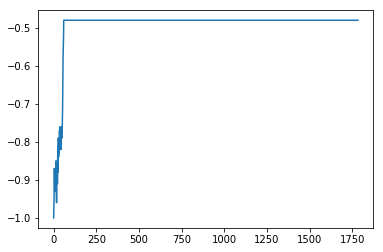

In [5]:
#LOOKING AT A TRAJECTORY
w.iteration = 85
final_trajectories = w.current.seg_id
traj_trace = w.trace(final_trajectories[79])
#print('What data can we access from our trace for segment {}?'.format(final_trajectories[45]))
#print(traj_trace.keys())
# Then plot something interesting about it, like the pcoord or the weight changes over time.
# The resulting plot is per time point, not iteration.
plt.plot(traj_trace['pcoord'])
plt.show()
#plt.plot(np.log10(traj_trace['weights']))
#plt.show()
#trajectory = traj_trace['pcoord']
#print trajectory

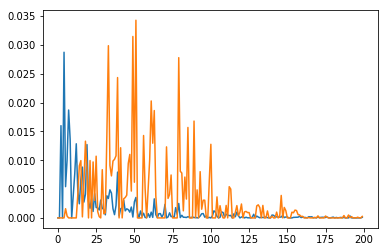

In [3]:
#Forward and backward first passage time distributions
plt.plot(it)
plt.plot(it_back)

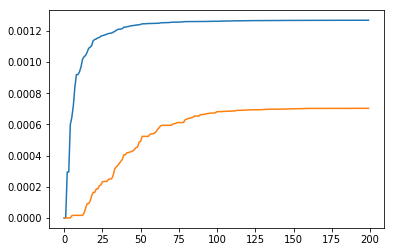

In [4]:
#check for convergence
plt.plot(flux_array)
plt.plot(flux_back_array)

In [5]:
print it
f1 = open('FPTD_forward.dat','w')

for i in range(len(it)):
    print >>f1, i*tau, it[i]
    
f1.close()


f2 = open('FPTD_back.dat','w')

for i in range(len(it)):
    print >>f2, i*tau, it_back[i]
    
f2.close()

[0.0, 0.0, 0.016, 0.0, 0.028735802469135804, 0.0054222222222222224, 0.010074074074074074, 0.018714074074074074, 0.013653333333333333, 0.0, 0.0037925925925925926, 0.0076444444444444442, 0.012859259259259258, 0.0047051851851851846, 0.0024492949245541839, 0.0067307654320987653, 0.0088123319615912212, 0.002750545953360768, 0.0041078806584362139, 0.012717133058984911, 0.0028951074531321447, 0.001683676268861454, 0.0033456057765584514, 0.001118079698216735, 0.0042250451607986584, 0.0018098098994055786, 0.0017409179749021998, 0.0013783670832698267, 0.0031103592245423292, 0.0016585951660485357, 0.0014963885009907027, 0.00053799944749276035, 0.0038418398380629269, 0.0033739905121170548, 0.0048722217933458278, 0.0043090064400610794, 0.0015900383440412484, 0.00056462245713023642, 0.0021729270399851535, 0.0079437804012660665, 0.00033234320702269865, 0.0015820332042959808, 0.0017698483088009307, 0.0030701481447246515, 0.0012221535738259207, 0.0015795729821960482, 0.0014423914000547052, 0.0009973490